In [1]:
import numpy as np
from scipy.ndimage import uniform_filter


In [2]:
features = np.load("../data/processed_features.npy")

print("Input feature shape:", features.shape)


Input feature shape: (2004, 2225, 3)


In [3]:
from scipy.ndimage import uniform_filter

def multi_scale_stats(feature, window_size):
    mean = uniform_filter(feature, size=window_size)
    var = uniform_filter(feature**2, size=window_size) - mean**2
    return mean, var


In [4]:
scales = [3, 9, 21]
msff_features = []

for band in range(features.shape[-1]):
    band_data = features[:, :, band]
    for scale in scales:
        mean, var = multi_scale_stats(band_data, scale)
        msff_features.append(mean)
        msff_features.append(var)


In [5]:
msff_stack = np.stack(msff_features, axis=-1)

print("MSFF feature shape:", msff_stack.shape)


MSFF feature shape: (2004, 2225, 18)


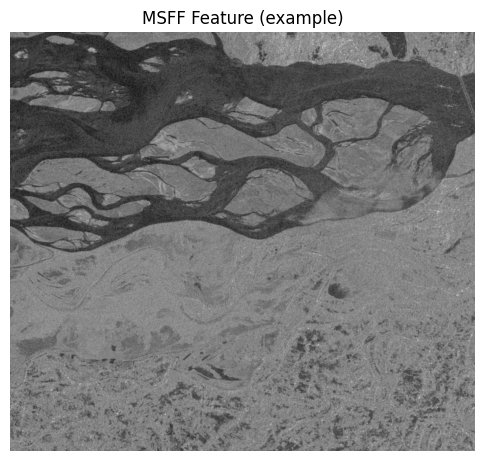

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(msff_stack[:, :, 0], cmap="gray")
plt.title("MSFF Feature (example)")
plt.axis("off")
plt.show()


In [7]:
np.save("../data/msff_features.npy", msff_stack)
print("PHASE‑3 MSFF features saved successfully")


PHASE‑3 MSFF features saved successfully
